In [28]:
import pandas as pd
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


The Question:This code covers
    
- Do certain professions retire at an earlier age?

In [13]:
retirees_df = pd.read_excel(open('data/Previous jobs of retireees - cleaned.xlsx', 'rb'),
              sheet_name='Data 4.1')
retirees_df.head()


,Year,Population of Interest,Sex,Classification,Category,54 years and under,55 - 59 years,60 - 64 years,65 - 69 years,70 years and over,Total,Average age at retirement years
0,2014-15,People aged 45 years and over,Persons,Status in employment of last job,Had a job in the last 20 years,652.118,560.437,633.426,384.288,170.014,2400.282,58.360
1,2014-15,People aged 45 years and over,Persons,Status in employment of last job,Employee,546.831,430.717,484.554,274.565,108.509,1845.176,57.752
2,2014-15,People aged 45 years and over,Persons,Status in employment of last job,with paid leave entitlements,352.237,331.567,374.089,201.877,67.135,1326.904,58.201
3,2014-15,People aged 45 years and over,Persons,Status in employment of last job,without paid leave entitlements,194.594,99.151,110.465,72.688,41.375,518.272,56.601
4,2014-15,People aged 45 years and over,Persons,Status in employment of last job,Owner manager,82.123,112.822,134.598,104.000,59.367,492.909,61.017


In [14]:
population_df = pd.read_excel(open('data/Populations by State and Teritory - cleaned.xlsx', 'rb'),
              sheet_name='Data 13.1')
population_df.head()

,Year,Population of Interest,Sex,Classification,Category,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Australia
0,2014-15,P01 - All people aged 45 years and over,Persons,Scope,P01 - All people aged 45 years and over,2873.598,2215.417,1721.291,689.103,886.740,225.157,63.577,130.546,8805.428
1,2014-15,P01 - All people aged 45 years and over,Persons,Scope,P02 - People who were working or had worked be...,2759.483,2134.037,1674.521,671.861,870.586,220.058,61.797,126.827,8519.170
2,2014-15,P01 - All people aged 45 years and over,Persons,Scope,P03 - People who had never worked before,114.116,81.380,46.770,17.242,16.155,5.098,1.780,3.718,286.258
3,2014-15,P01 - All people aged 45 years and over,Persons,Labour force status,P04 - People in the labour force,1480.193,1216.047,891.244,349.624,507.451,111.027,47.879,79.346,4682.812
4,2014-15,P01 - All people aged 45 years and over,Persons,Labour force status,P05 - Employed people,1421.700,1158.283,858.446,334.831,495.982,106.863,47.433,78.230,4501.768


In [15]:
retirees_df['Classification'].unique()

array(['Status in employment of last job',
       'Usual weekly hours worked in last job', 'Occupation of last job',
       'Skill level of last job', 'Industry of last job', 'TOTAL'],
      dtype=object)

In [16]:
retirees_df.loc[retirees_df['Classification'] == 'Industry of last job']['Category'].unique()

array(['Agriculture, forestry and fishing', 'Mining', 'Manufacturing',
       'Electricity, gas, water and waste services', 'Construction',
       'Wholesale trade', 'Retail trade',
       'Accommodation and food services',
       'Transport, postal and warehousing',
       'Information Media and telecommunications',
       'Financial and insurance services',
       'Rental, hiring and real estate services',
       'Professional, scientific and technical services',
       'Administrative and support services',
       'Public administration and safety', 'Education and training',
       'Health care and social assistance',
       'Arts and recreation services', 'Other services'], dtype=object)

# Do certain professions retire at an earlier age?

In [20]:
industry_condition = (retirees_df['Classification'] =='Industry of last job')
gender_condition = (retirees_df['Sex'] == 'Persons') # Keeping all genders
list_states = ['New South Wales',
'Victoria',
'Queensland',
'South Australia',
'Western Australia',
'Tasmania',
'Northern Territory',
'Australian Capital Territory'
] # only exploring state level information
state_condition = (retirees_df['Population of Interest'].isin(list_states))



retirement_df = retirees_df.loc[industry_condition & gender_condition & state_condition] # applying all conditions
retirement_df

,Year,Population of Interest,Sex,Classification,Category,54 years and under,55 - 59 years,60 - 64 years,65 - 69 years,70 years and over,Total,Average age at retirement years
1561,2014-15,New South Wales,Persons,Industry of last job,"Agriculture, forestry and fishing",2.489,0.529,7.398,0.000,4.389,14.805,64.666
1562,2014-15,New South Wales,Persons,Industry of last job,Mining,0.000,2.272,2.057,2.323,0.000,6.652,62.190
1563,2014-15,New South Wales,Persons,Industry of last job,Manufacturing,27.878,20.431,20.648,20.851,9.359,99.168,58.729
1564,2014-15,New South Wales,Persons,Industry of last job,"Electricity, gas, water and waste services",1.408,2.841,8.509,3.050,0.000,15.808,60.054
1565,2014-15,New South Wales,Persons,Industry of last job,Construction,13.452,9.563,12.276,3.667,2.077,41.035,56.476
...,...,...,...,...,...,...,...,...,...,...,...,...
16416,2020-21,Australian Capital Territory,Persons,Industry of last job,Public administration and safety,1.726,7.469,3.950,4.344,0.000,17.489,59.367
16417,2020-21,Australian Capital Territory,Persons,Industry of last job,Education and training,0.000,1.347,1.209,0.443,0.000,3.000,60.231
16418,2020-21,Australian Capital Territory,Persons,Industry of last job,Health care and social assistance,0.684,1.326,0.701,0.960,0.000,3.671,59.636
16419,2020-21,Australian Capital Territory,Persons,Industry of last job,Arts and recreation services,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [21]:
# years presentr in the dataset

retirement_df.Year.unique()

array(['2014-15', '2016-17', '2018-19', '2020-21'], dtype=object)

In [22]:
# calalculating over all average retirement age of all given  yaers by grouping  all given  years(2014-2021) and categories
avg_retirement_age = retirement_df.groupby('Category')['Average age at retirement years'].mean().sort_values()
avg_retirement_age

Category
Financial and insurance services                   48.167812
Electricity, gas, water and waste services         48.836750
Mining                                             50.884813
Information Media and telecommunications           51.265219
Agriculture, forestry and fishing                  52.085656
Rental, hiring and real estate services            52.455281
Manufacturing                                      52.934750
Wholesale trade                                    54.228031
Arts and recreation services                       54.827781
Administrative and support services                54.922875
Other services                                     57.319500
Accommodation and food services                    57.800562
Retail trade                                       58.038000
Health care and social assistance                  59.814750
Public administration and safety                   59.912312
Construction                                       60.041156
Education and t

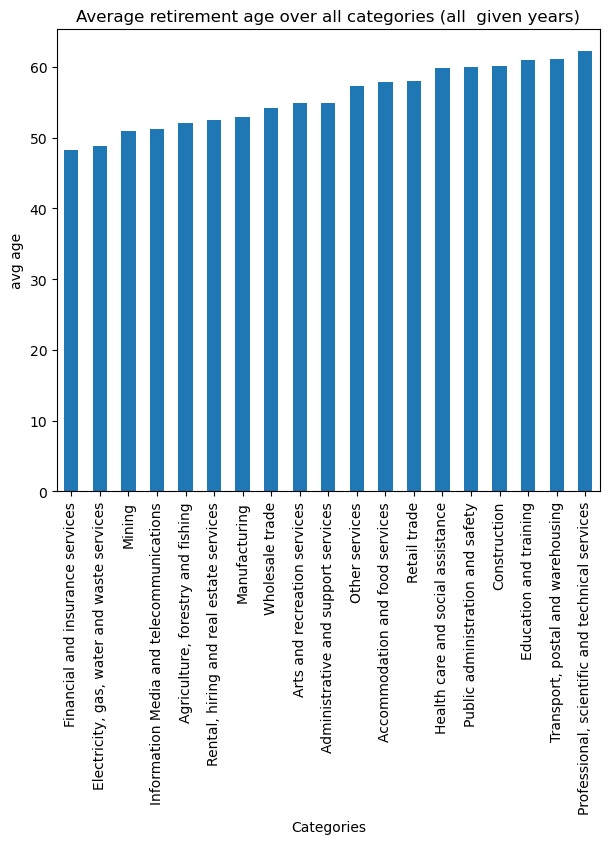

In [36]:
#average retirement age in different categories in  years 2014-2021
avg_retirement_age.plot(kind='bar',figsize=(7, 6) )
plt.title("Average retirement age over all categories (all  given years)")
plt.xlabel("Categories")
plt.ylabel("avg age")
plt.show()

In [37]:
#top 5 categories of years 2014-2021

avg_retirement_age.nsmallest(n=5, keep='first')

Category
Financial and insurance services              48.167812
Electricity, gas, water and waste services    48.836750
Mining                                        50.884813
Information Media and telecommunications      51.265219
Agriculture, forestry and fishing             52.085656
Name: Average age at retirement years, dtype: float64

In [42]:

# calalculating over all median retirement age of all given  yaers by grouping  all given  years(2014-2021) and categories

med_retirement_age = retirement_df.groupby('Category')['Average age at retirement years'].median().sort_values()
med_retirement_age

Category
Administrative and support services                57.4865
Accommodation and food services                    57.6080
Financial and insurance services                   57.7515
Retail trade                                       57.8765
Manufacturing                                      58.3165
Rental, hiring and real estate services            58.3705
Information Media and telecommunications           58.5450
Other services                                     59.4330
Public administration and safety                   59.6490
Health care and social assistance                  59.6700
Wholesale trade                                    59.7155
Electricity, gas, water and waste services         59.7920
Education and training                             60.0245
Arts and recreation services                       60.1245
Mining                                             60.2900
Transport, postal and warehousing                  60.6655
Construction                                   

Text(0, 0.5, 'Median age')

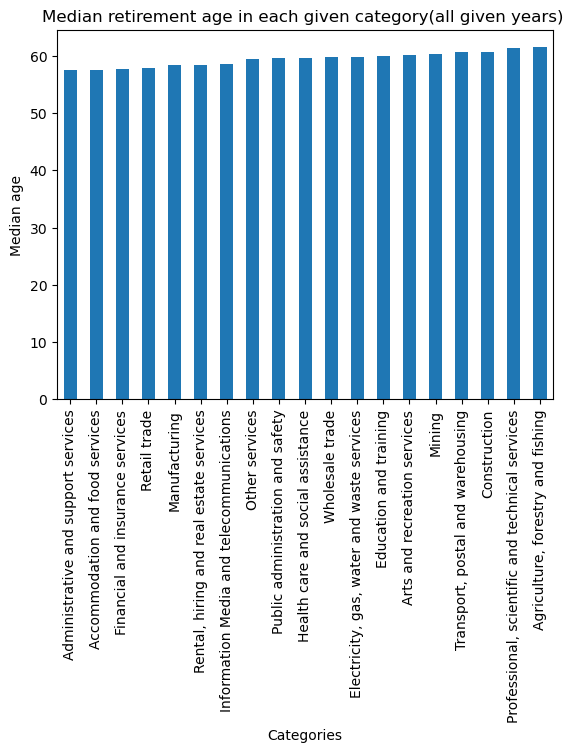

In [43]:
# graph average age values by industry category
med_retirement_age.plot(kind='bar')
plt.title("Median retirement age in each given category(all given years) ")
plt.xlabel("Categories")
plt.ylabel("Median age")

In [45]:
# top 5 median values of average age years
top5_median_categories=med_retirement_age.nsmallest(n=5, keep='first')
top5_median_categories

Category
Administrative and support services    57.4865
Accommodation and food services        57.6080
Financial and insurance services       57.7515
Retail trade                           57.8765
Manufacturing                          58.3165
Name: Average age at retirement years, dtype: float64

In [46]:
#finding years for top 5 meadian age values
# Filter the DataFrame to include only the top 5 median categories
top5_median_categories_data = retirement_df[retirement_df['Category'].isin(top5_median_categories.index)]

# Find the years for the top 5 median categories
years_for_top5_median_categories = top5_median_categories_data.groupby('Category')['Year'].first()

# Display the result
print(years_for_top5_median_categories)

Category
Accommodation and food services        2014-15
Administrative and support services    2014-15
Financial and insurance services       2014-15
Manufacturing                          2014-15
Retail trade                           2014-15
Name: Year, dtype: object


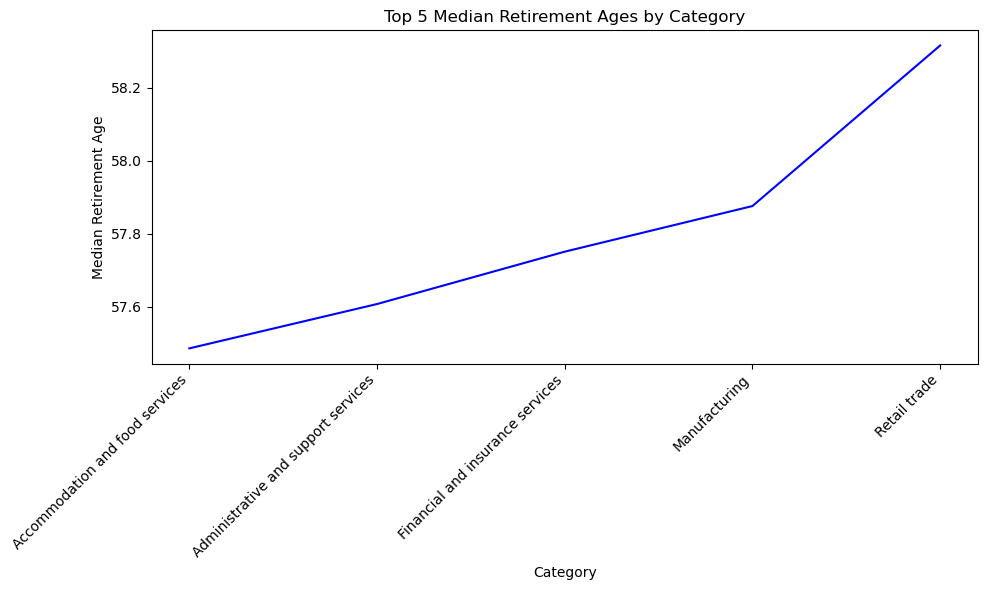

In [56]:
#graph represents meadian values of average age years in ll categories



plt.figure(figsize=(10, 6))
plt.plot(years_for_top5_median_categories.index, top5_median_categories.values, color='blue')
plt.xlabel('Category')
plt.ylabel('Median Retirement Age')
plt.title('Top 5 Median Retirement Ages by Category')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better visibility
plt.tight_layout()

# Display the plot
plt.show()









# Average age value  years by category and comparing two years 2018 and 2020


In [59]:
# avg age value by category and comparing two years
# Convert 'Year' column to datetime type if it's not already
#retirement_df['Year'] = pd.to_datetime(retirement_df['Year']
# Convert 'Year' column to datetime type if it's not already
#retirement_df['Year'] = pd.to_datetime(retirement_df['Year'].str.split('-').str[0], format='%Y')
# Assuming you want to convert to string
#retirement_df['Year'] = retirement_df['Year'].astype(str)
#retirement_df['Year'] = pd.to_datetime(retirement_df['Year'])

# Filter the DataFrame for the years 2018 and 2020
selected_years = ["2018-19", "2020-21"]
filtered_data_byyears = retirement_df[retirement_df['Year'].isin(selected_years)]

print(filtered_data_byyears)
# Calculate the average age to retire by industry
average_age_by_industry_years = filtered_data_byyears.groupby(['Year', 'Category'])['Average age at retirement years'].mean()

# Convert the result to a DataFrame
average_age_by_industry_year_df = average_age_by_industry_years.reset_index()

# Display the result
#print(len("retirement_df"))
#print(len(average_age_by_industry_year_df))

          Year        Population of Interest      Sex        Classification  \
10741  2018-19               New South Wales  Persons  Industry of last job   
10742  2018-19               New South Wales  Persons  Industry of last job   
10743  2018-19               New South Wales  Persons  Industry of last job   
10744  2018-19               New South Wales  Persons  Industry of last job   
10745  2018-19               New South Wales  Persons  Industry of last job   
...        ...                           ...      ...                   ...   
16416  2020-21  Australian Capital Territory  Persons  Industry of last job   
16417  2020-21  Australian Capital Territory  Persons  Industry of last job   
16418  2020-21  Australian Capital Territory  Persons  Industry of last job   
16419  2020-21  Australian Capital Territory  Persons  Industry of last job   
16420  2020-21  Australian Capital Territory  Persons  Industry of last job   

                                         Category  

C:\Users\swapn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\swapn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\swapn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\swapn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

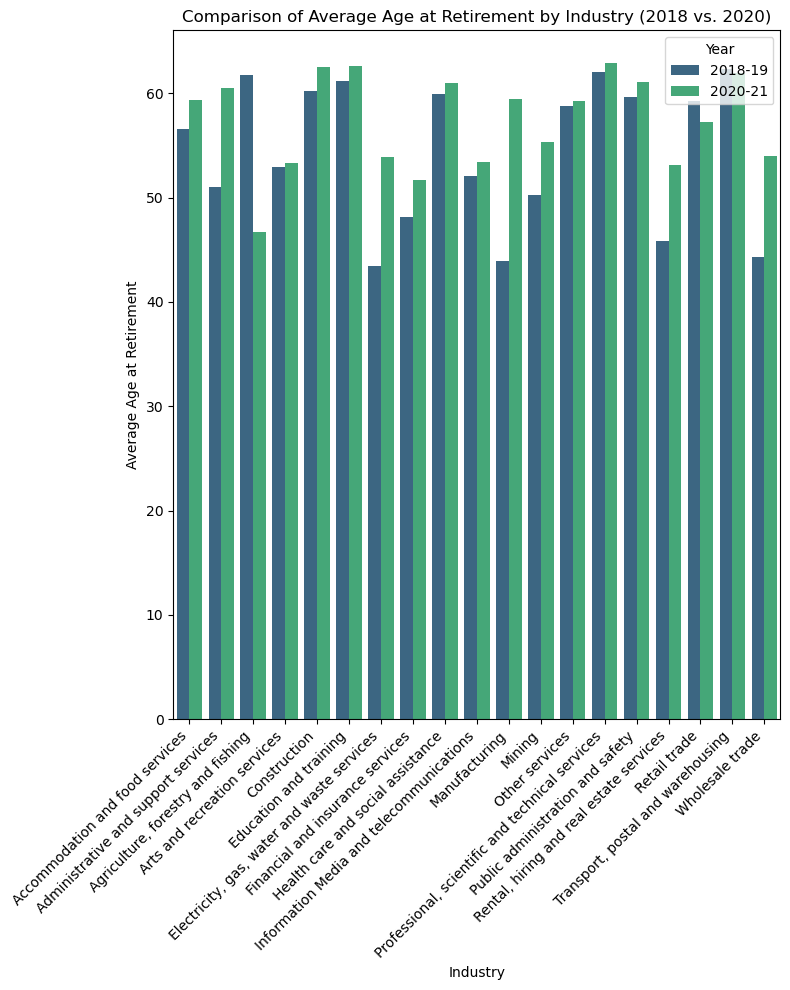

In [63]:
# chart showing year 2018 and 2020
import seaborn as sns

# Create a bar plot using seaborn
#sorted_df = average_age_by_industry_df.sort_values(by='Average age at retirement years', ascending=False)
plt.figure(figsize=(8, 10))
sns.barplot(x='Category', y='Average age at retirement years', hue='Year', data=average_age_by_industry_year_df, palette='viridis')
plt.xlabel('Industry')
plt.ylabel('Average Age at Retirement')
plt.title('Comparison of Average Age at Retirement by Industry (2018 vs. 2020)')
plt.legend(title='Year')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better visibility
plt.tight_layout()

# Display 
